# LOgistic Regression 

## Introduction
Logistic regression is a classification algorithm used to assing observation to a discrete set classes. unlike linear regression 
which output continuous number value  

Logistic regression predicts the probability of an outcome that can only have two values (i.e. a dichotomy). The prediction is based on the use of one or several predictors (numerical and categorical). A linear regression is not appropriate for predicting the value of a binary variable for two reasons:

Logistic regression can be used for:

-   Binary classification 
-   Multi-class classification 
-   One-vs-Rest classification 
## Logistic Regression Assumptions

-   The predictor variables are independent
-   The predictor variables are normally distributed
-   The response variable is binary



In [8]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score, precision_score , f1_score ,confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , minmax_scale

In [9]:
df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
# pre prcoess the data 
# remove the deck colum 
df.drop('deck' , axis = 1 , inplace = True)
#impute missing values in age and fare with median 
df['age'] = df['age'].fillna(df['age'].median(), inplace=True)
df['fare'] = df['fare'].fillna(df['fare'].median(), inplace=True) 
# impute missing values in embarked and embared_town 
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# ecnode the categorical variables using for loop where oject and category datatypes are given 
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = LabelEncoder().fit_transform(df[i])

df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,0,1,0,0,2,2,1,True,2,0,False
1,1,1,0,0,1,0,0,0,0,2,False,0,1,False
2,1,3,0,0,0,0,0,2,2,2,False,2,1,True
3,1,1,0,0,1,0,0,2,0,2,False,2,1,False
4,0,3,1,0,0,0,0,2,2,1,True,2,0,True


In [12]:
# X and y columns 
X = df.drop('survived' , axis = 1)
y = df['survived']

In [13]:
# train test split the data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [14]:
# call model 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# predict the values
y_pred = model.predict(X_test)

In [20]:
# evaluate the model 

print('Accuracy score : ' , accuracy_score(y_test , y_pred))
print('Recall score : ' , recall_score(y_test , y_pred))
print('Precision score : ' , precision_score(y_test , y_pred))
print('F1 score : ' , f1_score(y_test , y_pred))
print('Confusion matrix : ' , confusion_matrix(y_test , y_pred))
print('Classification report : ' , classification_report(y_test , y_pred))



Accuracy score :  1.0
Recall score :  1.0
Precision score :  1.0
F1 score :  1.0
Confusion matrix :  [[110   0]
 [  0  69]]
Classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



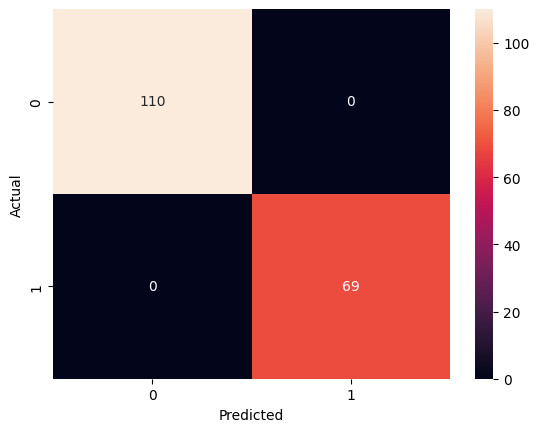

In [22]:
# plot the confusion the metric

sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [23]:
# save the model 
import pickle
pickle.dump(model , open('./saved_models/02_model_logistic_regressiom.pkl' , 'wb'))
